In [1]:
from fastai.vision.all import *


In [2]:
data_dir = Path("dk_bugs")

In [3]:
files = get_image_files(data_dir)
len(files)

402

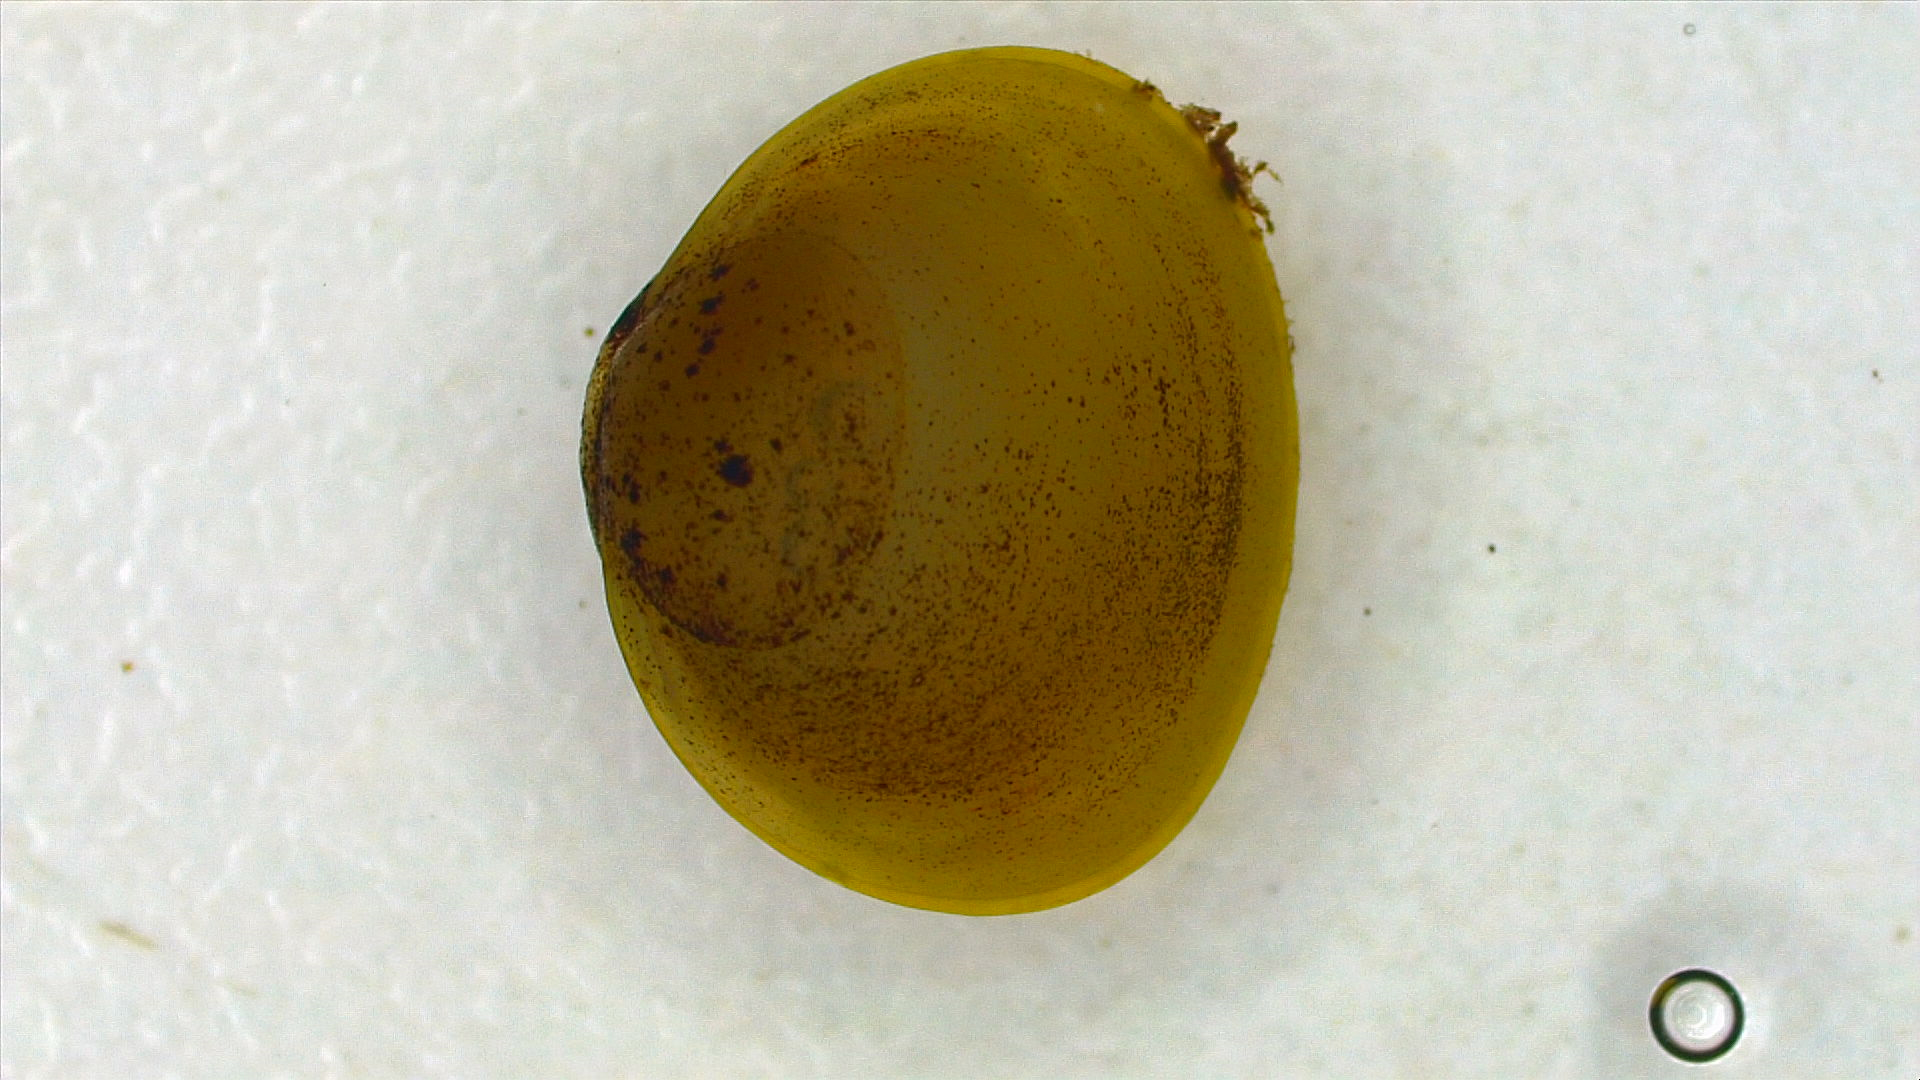

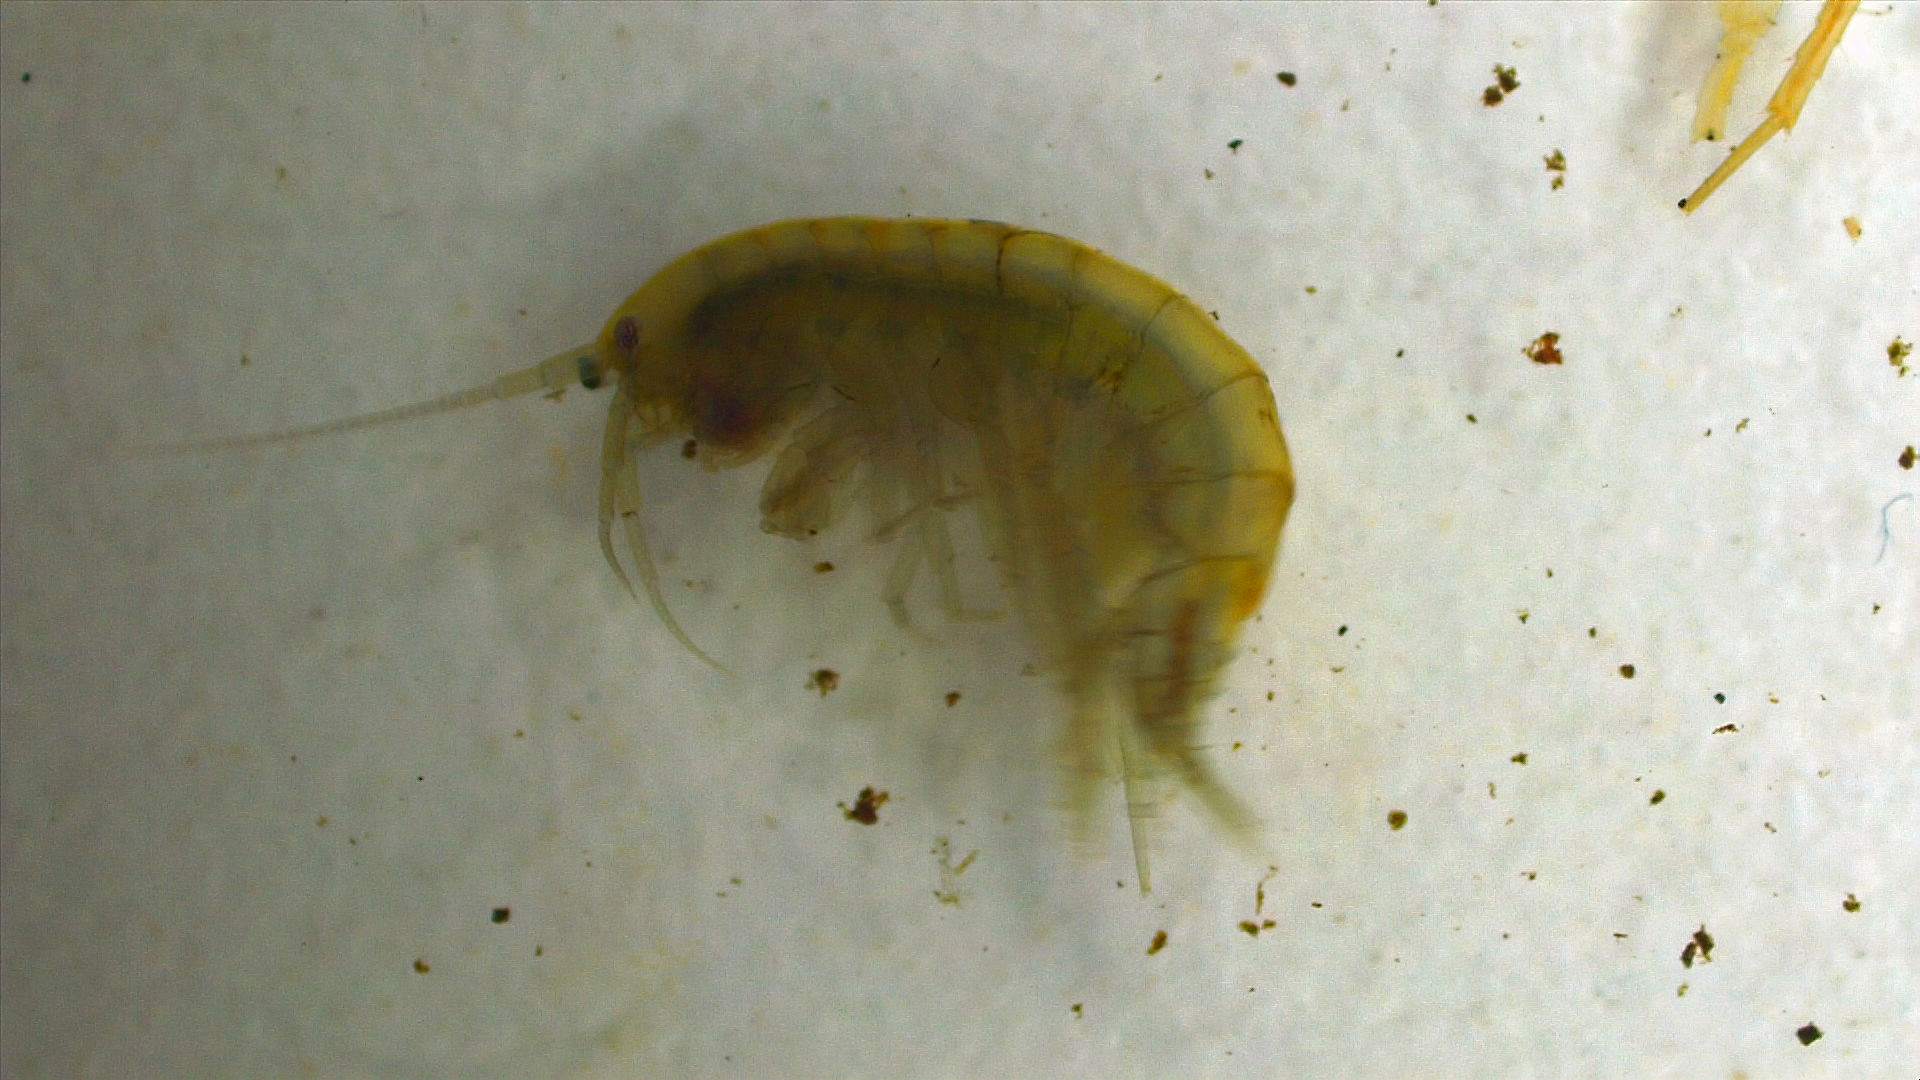

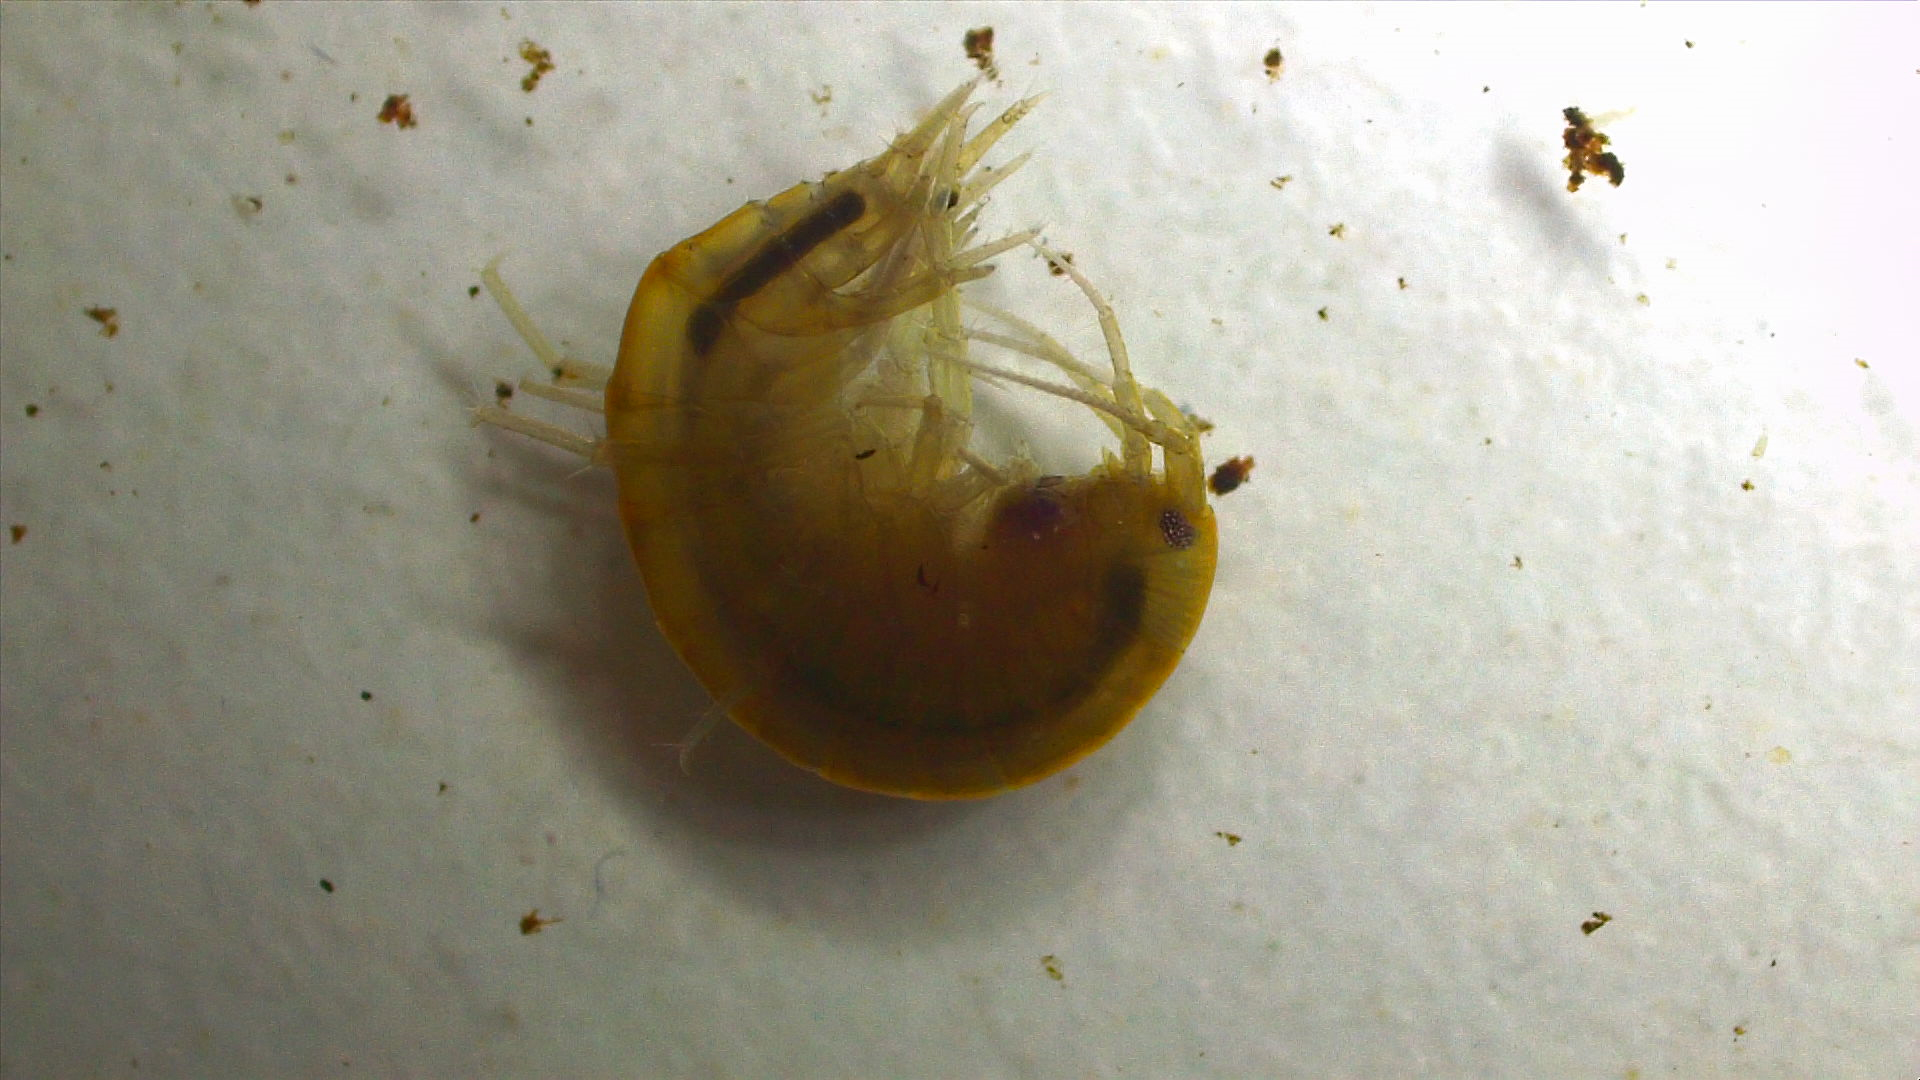

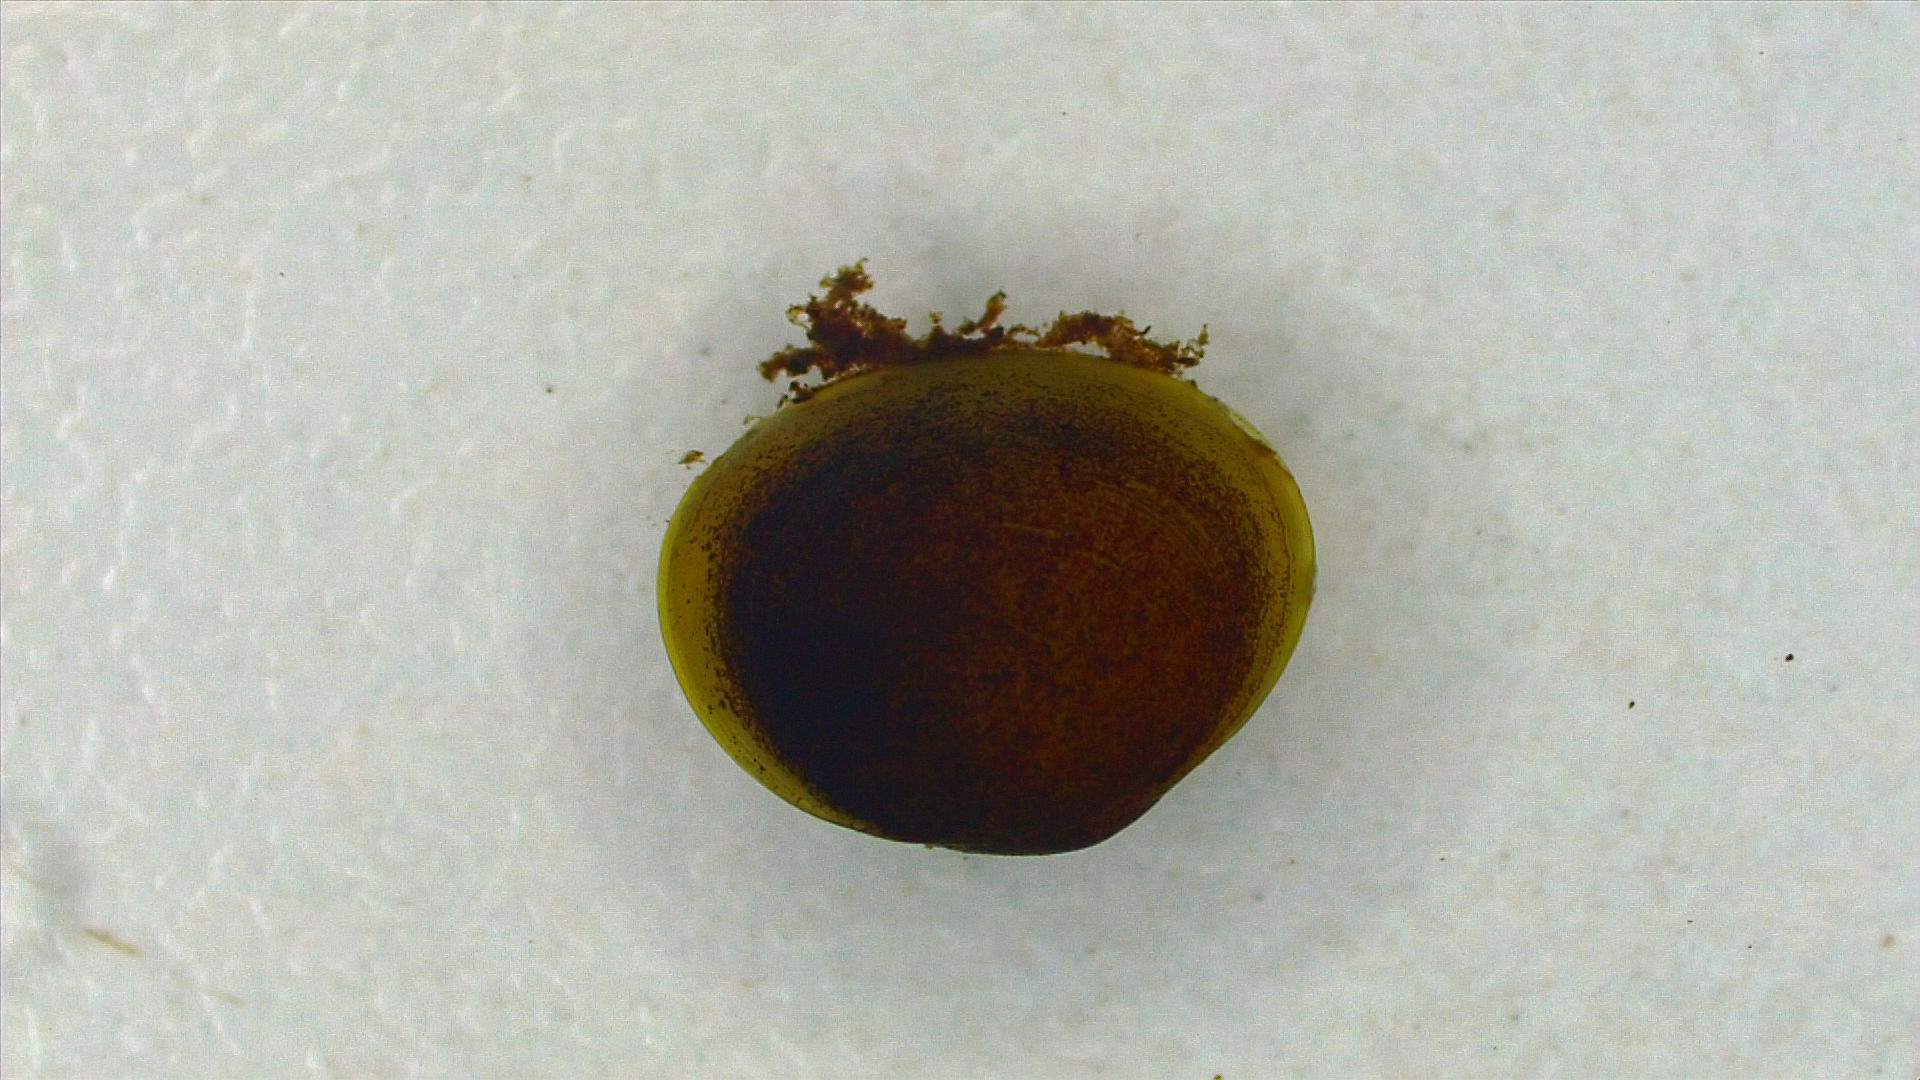

In [4]:
from IPython.display import Image
from IPython.display import display

random_imgs = random.choices(files, k=4)

imgs_list = [Image(i, width = 140) for i in random_imgs] 

display(*imgs_list)

In [5]:
dataloaders = ImageDataLoaders.from_folder(path=data_dir, 
                                           valid_pct=0.2,
                                           bs=64,
                                           item_tfms=Resize(224), 
                                           batch_tfms=aug_transforms(flip_vert=True))

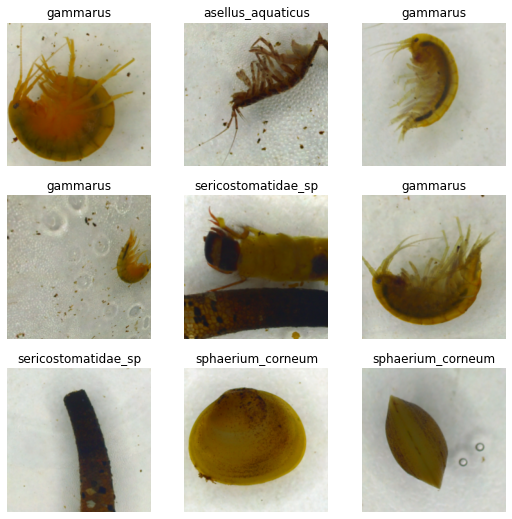

In [6]:
dataloaders.show_batch()

In [7]:
learn = cnn_learner(dataloaders, resnet18, metrics=error_rate)


In [40]:
learn.freeze()
learn.lr_find()


KeyboardInterrupt: 

In [8]:
learn.fine_tune(4, base_lr=0.001, freeze_epochs=2)

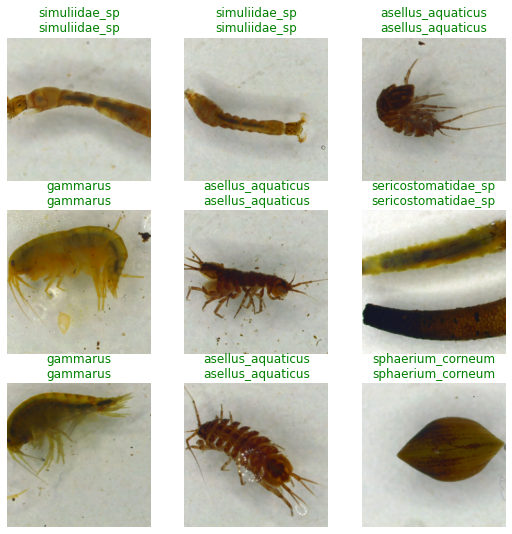

In [9]:
learn.show_results()


In [10]:
learn.export()